# The Predator-Prey Model, a.k.a.  Lotka-Volterra Equations

We use a touch of matplotlib, scipy, numpy, and sympy on this __[classic](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)__ from high school biology class. Its basic framework is inscribed in its separable partial differential equations, but the takeaway is an __[askew](https://www.google.com/search?q=askew)__ glance at mutual give and take. The realization of complexity in give and take, in an environment of other givers and takers, could aid in appreciating the potential complexity of __[business forces](https://en.wikipedia.org/wiki/Porter%27s_five_forces_analysis)__. We add our flourish with the use of the Lambert W function.

 $$\frac{dx}{dt} = α * x - β * x * y$$  
 $$\frac{dy}{dt} = δ * x * y - γ * y$$
 
 x := prey,  y := predators 
 
 αx := Prey Birth Rate,  βxy := Prey Death Rate 
 
 δxy := Predator Birth Rate,  γy := Predator Death Rate
### 1. Let's get equation solvers working!

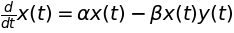

Eq(Derivative(x(t), t), α*x(t) - β*x(t)*y(t))


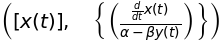

([x(t)], {(Derivative(x(t), t)/(α - β*y(t)),)})


In [1]:
from sympy.interactive import printing 
printing.init_printing(use_latex=True) 
import sympy as sp
from sympy import *

t, α, β, δ, γ = sp.symbols('t α β δ γ')

prey_eq = Eq(sp.Function('x')(t).diff(t), α * sp.Function('x')(t) - β * sp.Function('x')(t) * sp.Function('y')(t))
display(prey_eq) #this LaTeX may not render properly on github
print(prey_eq) #read this instead if so

prey_eq_answer=solve(prey_eq,sp.Function('x')(t),set=True)
display(prey_eq_answer)
print(prey_eq_answer)

### 2(a). Eliminate t dependence by taking (dy/dt)/(dx/dt) and then separating all the x and y terms.  Then integrate and find the constant of integration. 

According to wikipedia:
$$C_1 = δ x - γ ln(x) + βy - αln(y)$$


### 2(b). We can find (δ/γ) * x - ln(x) in terms of y now. But what if we wanted to find x in terms of y? Let's let SymPy do the heavy lifting and find x in terms of y. Confirm it on paper.


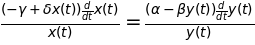

Eq(x(t), -γ*LambertW(-δ*exp((C1 - α*log(β*y(t)) + β*y(t))/γ)/γ)/δ)


In [2]:
simultaneous_eq = Eq(sp.Function('x')(t).diff(t)/sp.Function('x')(t)*(-γ+δ*sp.Function('x')(t)),sp.Function('y')(t).diff(t)/ sp.Function('y')(t) * (α-β*sp.Function('y')(t)))
display(simultaneous_eq)
prey_interms_predator=dsolve(simultaneous_eq,sp.Function('x')(t),set=True)
display(prey_interms_predator)
print(prey_interms_predator)

In [3]:
solve(prey_interms_predator)
print(solve(prey_interms_predator))

[{C1: γ*log(x(t)*exp((α*log(β*y(t)) - β*y(t) - δ*x(t))/γ))}]


In [4]:
x0, y0 = 2,2
α = 2/3
β = 4/3
γ = δ = 1

C1 = γ*log(x0*exp((α*log(β*y0) - β*y0 - δ*x0)/γ))
print (C1)

-3.31963331743224


### 3. Let's graph x as a function of y with Lambert W k=0, k=-1

In [5]:
# independently of time, solve for x as a function of y = 4.0, 3.999 , ... , 0.001
from scipy.special import lambertw

x0, y0 = 2,2
α = 2/3
β = 4/3
γ = δ = 1
C1 = -3.31963331743224 


y_iterate=4
x_values=[]
y_values=[]
x_values_branch=[]
y_values_branch=[]
while y_iterate > .001:
    if (-γ/δ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)),k=0).real)) > 0:
        x_values.append(-γ/δ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)),k=0).real))
        y_values.append(y_iterate)
    if (-γ/δ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)),k=-1).real)) > 0:
        x_values_branch.append(-γ/δ*(lambertw(float(-δ*exp((C1 - α*log(β*y_iterate) + β*y_iterate/γ)/γ)),k=-1).real))
        y_values_branch.append(y_iterate)
    y_iterate-=.001    

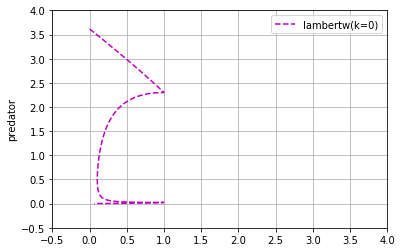

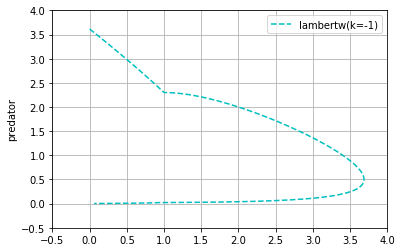

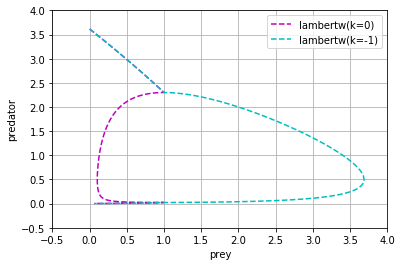

In [11]:
import matplotlib.pyplot as plt

plt.plot(x_values, y_values,'m--', label=r'lambertw(k=0)')
plt.xlim(( -.5, 4))
plt.ylim((-.5, 4))
plt.ylabel('predator')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.plot(x_values_branch, y_values_branch,'c--', label=r'lambertw(k=-1)')
plt.xlim(( -.5, 4))
plt.ylim((-.5, 4))
plt.ylabel('predator')
plt.legend(loc='best')
plt.grid(True)
plt.show()

plt.plot(x_values,y_values,'m--',label=r'lambertw(k=0)')
plt.plot(x_values_branch,y_values_branch,'c--',label=r'lambertw(k=-1)')
plt.xlim(( -.5, 4))
plt.ylim((-.5, 4))
plt.ylabel('predator')
plt.xlabel('prey')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 4. What if we wanted  a sense of time? Let's solve the predator-prey model with numerical integration so we can see the speed of the change in prey and predators.



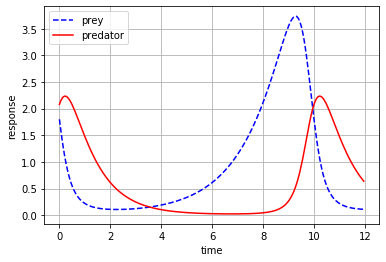

In [7]:
import matplotlib.pyplot as plt 

x0,y0 = 2,2
alpha = 2/3
beta = 4/3
gamma = delta = 1
dt=.05

x=[]
y=[]
time=[]


for t in range(240):
    x0 = (alpha * x0 - beta * x0 * y0)*dt + x0 # 2-term taylor expansion forward explicit
    y0 = (delta * x0 * y0 - gamma * y0)*dt + y0 # uses y(t+∆t)=y(t)+y'(x(t+∆t))∆t
    x.append(x0)
    y.append(y0)
    time.append(t*dt)
plt.plot(time,x,'b--',label=r'prey')
plt.plot(time,y,'r-',label=r'predator')
plt.grid(True)
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')

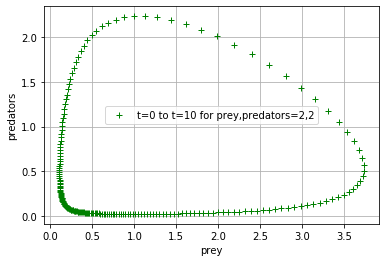

In [8]:
#Where every green "+" is one time step. We get real slow when prey and predator are near 0.
plt.plot(x[0:200],y[0:200], 'g+',label='t=0 to t=10 for prey,predators=2,2')
plt.ylabel('predators')
plt.xlabel('prey')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 5. We animate the phase space so you can get a sense of speed. Code originally by __[Louis Tiao](http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/)__.

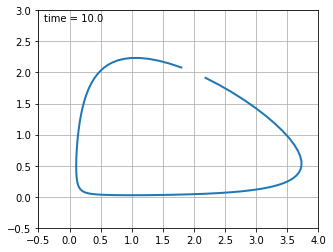

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
# First set up the figure, the axis, and the plot element we want to animate
x_animate=x[0:200]
y_animate=y[0:200]


fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-.5, 4), ylim=(-.5, 3))
ax.grid()
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    line.set_label
    time_text.set_text('')
    return line, time_text

def animate(i):
    x = np.asmatrix(x_animate[:i], dtype=float)
    y = np.asmatrix(y_animate[:i] , dtype=float)
    line.set_data(x,y)
    time_text.set_text('time = %.1f' % time[i])
    return line, time_text

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=1, blit=True)

HTML(anim.to_jshtml())

### 6. Let's make sure we know how to use scipy's integration.

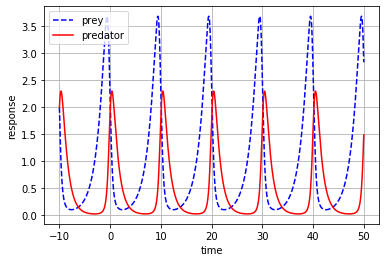

In [10]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

x0, y0 = 2,2
α = 2/3
β = 4/3
γ = δ = 1

# function that returns dz/dt
def model(z,t):
    dxdt = α * z[0] - β * z[0] * z[1]
    dydt = δ * z[0] * z[1] - γ * z[1]
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [x0,y0]

# time points
t = np.linspace(-10,50,100000)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b--',label=r'prey')
plt.plot(t,z[:,1],'r-',label=r'predator')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.grid(True)
plt.show()

#### This project was inspired by thinking about the past. 
I was making mental inventory of some business concepts recently and I realized many were cyclic phenomena. 

For example, the bullwhip effect in supply chain management is caused by a growing cone of uncertainty (growing waves) concerning safety stock. I also can't not mention the natural boom and bust of the business cycle.

But going all the way back, the first wave relationship I was captivated by was in 9th grade biology class. The fox and hare's predator-prey relationship! I'd wanted to experiment with some of the scientific python libraries for some time, so this was the result. 

My unique touch on this classic is that I ended up building the phase plot with the principal and -1 branches of the  Lambert-W function as a result of experimenting with sympy.